**Applied Data Science Lab Experiment No. 01 - Descriptive & Inferential Statistics**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = {
    "Student_ID": range(1, 16),
    "Marks": [56, 78, 45, 89, 67, 72, 88, 90, 54, 61, 70, 85, 76, np.nan, 69],
    "Study_Hours": [2.5, 4.0, 1.8, 5.2, 3.1, 3.5, 5.0, 5.5, 2.2, 2.8, 3.4, 4.8, 4.0, 3.0, np.nan],
    "Attendance": [75, 85, 65, 92, 80, 82, 90, 95, 70, 78, 84, 88, 86, 80, 83]
}

df = pd.DataFrame(data)
df

,Student_ID,Marks,Study_Hours,Attendance
0,1,56.0,2.5,75
1,2,78.0,4.0,85
2,3,45.0,1.8,65
3,4,89.0,5.2,92
4,5,67.0,3.1,80
5,6,72.0,3.5,82
6,7,88.0,5.0,90
7,8,90.0,5.5,95
8,9,54.0,2.2,70
9,10,61.0,2.8,78


In [ ]:
df.mean(numeric_only=True), df.median(numeric_only=True), df.mode().iloc[0]

(Student_ID      8.000000
 Marks          71.428571
 Study_Hours     3.628571
 Attendance     82.200000
 dtype: float64,
 Student_ID      8.00
 Marks          71.00
 Study_Hours     3.45
 Attendance     83.00
 dtype: float64,
 Student_ID      1.0
 Marks          45.0
 Study_Hours     4.0
 Attendance     80.0
 Name: 0, dtype: float64)

In [ ]:
df.min(numeric_only=True), df.max(numeric_only=True), df.sum(numeric_only=True)

(Student_ID      1.0
 Marks          45.0
 Study_Hours     1.8
 Attendance     65.0
 dtype: float64,
 Student_ID     15.0
 Marks          90.0
 Study_Hours     5.5
 Attendance     95.0
 dtype: float64,
 Student_ID      120.0
 Marks          1000.0
 Study_Hours      50.8
 Attendance     1233.0
 dtype: float64)

In [ ]:
df.max(numeric_only=True) - df.min(numeric_only=True)

,0
Student_ID,14.0
Marks,45.0
Study_Hours,3.7
Attendance,30.0


In [ ]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

Q1, Q3, IQR

(Student_ID      4.50
 Marks          62.50
 Study_Hours     2.85
 Attendance     79.00
 Name: 0.25, dtype: float64,
 Student_ID     11.50
 Marks          83.25
 Study_Hours     4.60
 Attendance     87.00
 Name: 0.75, dtype: float64,
 Student_ID      7.00
 Marks          20.75
 Study_Hours     1.75
 Attendance      8.00
 dtype: float64)

In [ ]:
df.std(numeric_only=True), df.var(numeric_only=True)

(Student_ID      4.472136
 Marks          14.014906
 Study_Hours     1.163171
 Attendance      8.037413
 dtype: float64,
 Student_ID      20.000000
 Marks          196.417582
 Study_Hours      1.352967
 Attendance      64.600000
 dtype: float64)

In [ ]:
df.corr(numeric_only=True)

,Student_ID,Marks,Study_Hours,Attendance
Student_ID,1.000000,0.182857,0.126469,0.196732
Marks,0.182857,1.000000,0.989486,0.977282
Study_Hours,0.126469,0.989486,1.000000,0.967221
Attendance,0.196732,0.977282,0.967221,1.000000


In [ ]:
stats.sem(df['Marks'], nan_policy='omit')

np.float64(3.74564110874782)

In [ ]:
(df.std(numeric_only=True) / df.mean(numeric_only=True)) * 100

,0
Student_ID,55.901699
Marks,19.620868
Study_Hours,32.055897
Attendance,9.777874


In [ ]:
(df.std(numeric_only=True) / df.mean(numeric_only=True)) * 100

,0
Student_ID,55.901699
Marks,19.620868
Study_Hours,32.055897
Attendance,9.777874


In [ ]:
df.isnull().sum(), len(df)

(Student_ID     0
 Marks          1
 Study_Hours    1
 Attendance     0
 dtype: int64,
 15)

In [ ]:
marks_sorted = df[['Marks']].dropna().sort_values(by='Marks')
marks_sorted['Cumulative N'] = range(1, len(marks_sorted)+1)
marks_sorted['Percent'] = (marks_sorted['Cumulative N'] / len(marks_sorted)) * 100
marks_sorted['Cumulative Percent'] = marks_sorted['Percent'].cumsum()

marks_sorted

,Marks,Cumulative N,Percent,Cumulative Percent
2,45.0,1,7.142857,7.142857
8,54.0,2,14.285714,21.428571
0,56.0,3,21.428571,42.857143
9,61.0,4,28.571429,71.428571
4,67.0,5,35.714286,107.142857
14,69.0,6,42.857143,150.000000
10,70.0,7,50.000000,200.000000
5,72.0,8,57.142857,257.142857
12,76.0,9,64.285714,321.428571
1,78.0,10,71.428571,392.857143


In [ ]:
stats.trim_mean(df['Marks'].dropna(), 0.1)

np.float64(72.08333333333333)

In [ ]:
mean_marks = df['Marks'].mean()
np.sum((df['Marks'].dropna() - mean_marks)**2)

np.float64(2553.4285714285706)

In [ ]:
df.skew(numeric_only=True), df.kurtosis(numeric_only=True)

(Student_ID     0.000000
 Marks         -0.306584
 Study_Hours    0.186936
 Attendance    -0.568549
 dtype: float64,
 Student_ID    -1.200000
 Marks         -0.748269
 Study_Hours   -1.066600
 Attendance     0.283390
 dtype: float64)

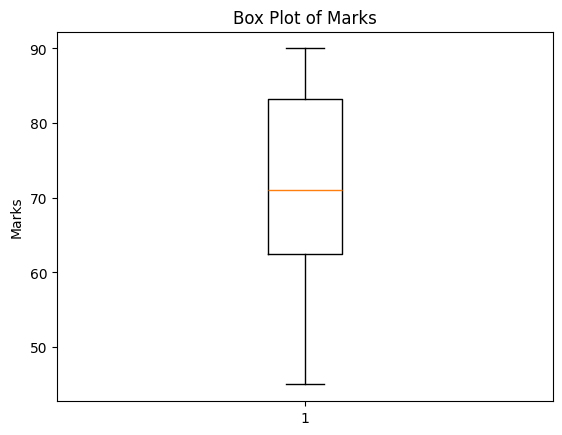

In [ ]:
plt.boxplot(df['Marks'].dropna())
plt.title("Box Plot of Marks")
plt.ylabel("Marks")
plt.show()

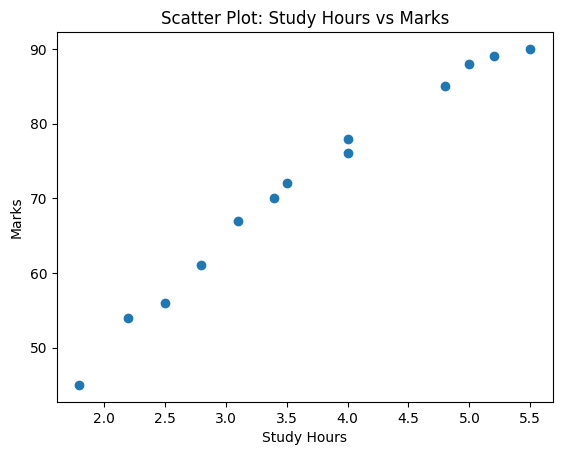

In [ ]:
plt.scatter(df['Study_Hours'], df['Marks'])
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Scatter Plot: Study Hours vs Marks")
plt.show()

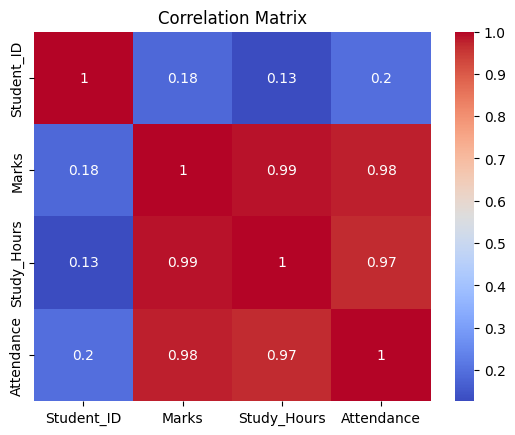

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

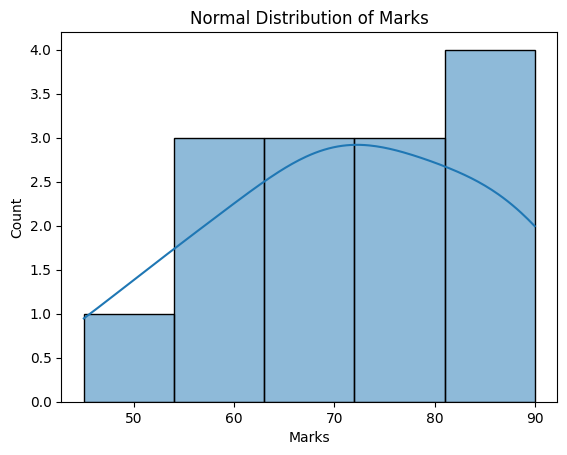

In [ ]:
sns.histplot(df['Marks'].dropna(), kde=True)
plt.title("Normal Distribution of Marks")
plt.show()

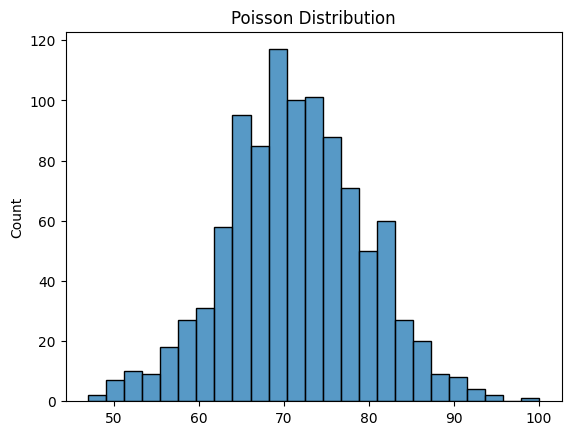

In [ ]:
poisson_data = np.random.poisson(lam=df['Marks'].mean(), size=1000)
sns.histplot(poisson_data)
plt.title("Poisson Distribution")
plt.show()

In [ ]:
stats.t.interval(
    0.95,
    len(df['Marks'].dropna())-1,
    loc=df['Marks'].mean(),
    scale=stats.sem(df['Marks'], nan_policy='omit')
)

(np.float64(63.33660577888077), np.float64(79.5205370782621))

In [ ]:
z_value = (df['Marks'].mean() - 70) / stats.sem(df['Marks'], nan_policy='omit')
z_value

np.float64(0.3813957042587582)

In [ ]:
t_stat, p_value = stats.ttest_1samp(df['Marks'].dropna(), 70)
t_stat, p_value

(np.float64(0.3813957042587582), np.float64(0.7090703845354359))

In [ ]:
group1 = df['Marks'][0:5].dropna()
group2 = df['Marks'][5:10].dropna()
group3 = df['Marks'][10:15].dropna()

stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=np.float64(0.37117773530817016), pvalue=np.float64(0.698242114128845))